In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
import helper_functions as hf
import seaborn as sn

In [2]:
data = np.loadtxt(open('m&ms.csv', 'rb'), delimiter=',', skiprows=1)
X = data[:,:3] # RGB values
y_true = data[:,3] # M&M labels

Text(0.5, 0, 'Blue')

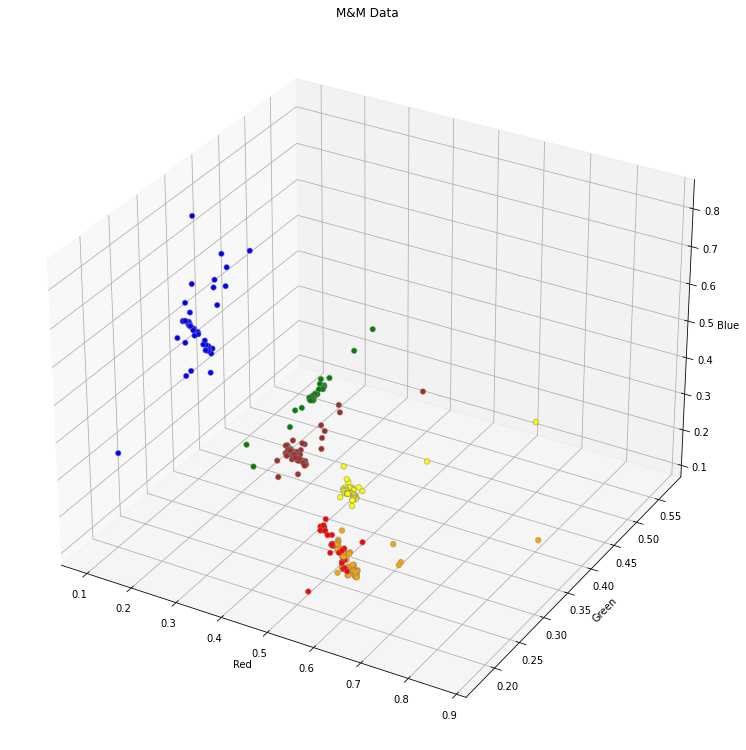

In [3]:
colourList = ['red','orange','yellow','green','blue','brown']
cmap = colors.ListedColormap(colourList)
edge = colors.colorConverter.to_rgba('grey', alpha=0.5)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y_true, cmap=cmap, edgecolor=edge, s=30, depthshade=False)
ax.title.set_text("M&M Data")
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

Make GIF...

In [4]:
# hf.makeGif(fig, ax, "colour_data.gif")

# Classifying M&Ms with Bounding Boxes

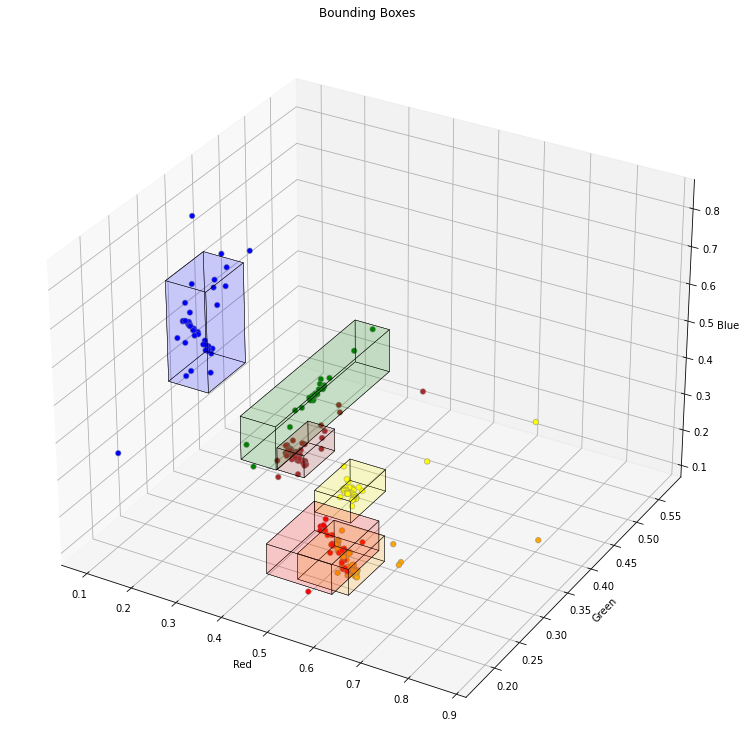

In [5]:
positions = [(0.47, 0.17, 0.18),
             (0.49, 0.21, 0.12),
             (0.39, 0.33, 0.11),
             (0.20, 0.35, 0.16),
             (0.10, 0.30, 0.40),
             (0.33, 0.31, 0.23)]

sizes = [(0.14, 0.09, 0.08),
         (0.11, 0.07, 0.07),
         (0.08, 0.07, 0.06),
         (0.08, 0.23, 0.12),
         (0.09, 0.07, 0.27),
         (0.06, 0.06, 0.06)]

pc = hf.plotCubeAt2(positions, sizes, colors=colourList, 
                 edgecolor='k', linewidth=0.4, alpha=0.1)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y_true, cmap=cmap, edgecolor=edge, s=30, depthshade=False)
ax.title.set_text("Bounding Boxes")
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.add_collection3d(pc)

In [6]:
# hf.makeGif(fig, ax, "bounding_boxes.gif")

## Predictions with Bounding Boxes

In [7]:
y_pred = np.full((y_true.shape), 6) # default value is "no classification"

def checkColour(p, x0,x1,y0,y1,z0,z1):
    px,py,pz = p
    if px>x0 and px<x1 and py>y0 and py<y1 and pz>z0 and pz<z1: return True
    return False


for i in range(len(X)):
    for j in range(6):
        R,G,B = positions[j]
        s0,s1,s2 = np.array(sizes[j])
        if checkColour(X[i], R,R+s0, G,G+s1, B,B+s2):
            y_pred[i] = j

Text(0.5, 1.0, 'Bounding Box Confusion Matrix')

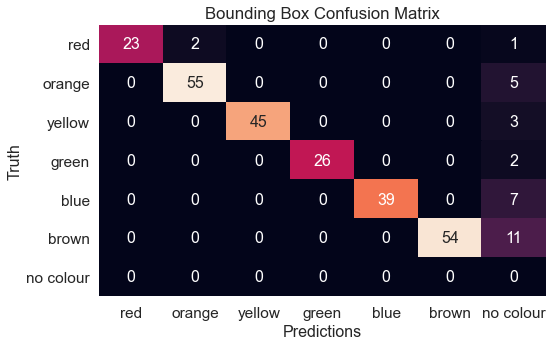

In [8]:
plt.figure(figsize=(8,5))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix(y_true, y_pred), annot=True, annot_kws={"size": 16},
           xticklabels=['red','orange','yellow','green','blue','brown','no colour'],
           yticklabels=['red','orange','yellow','green','blue','brown','no colour'],
           cbar=False)
plt.xlabel("Predictions",fontsize=16)
plt.ylabel("Truth",fontsize=16)
plt.title("Bounding Box Confusion Matrix")

# Fitting a Gaussian with Direct Estimation

In [9]:
mu,cov = [],[]
for i in range(6):
    X_ = X[y_true==i]
    
    mu.append(X_.mean(axis=0))
    cov.append(np.cov(X_.T))

Sampling from estimated distributions...

In [10]:
n = 5000
samps = np.zeros((6,n,3))
for i in range(6):
    samps[i] = np.random.multivariate_normal(mu[i],cov[i],size=n)

Text(0.5, 0, 'Blue')

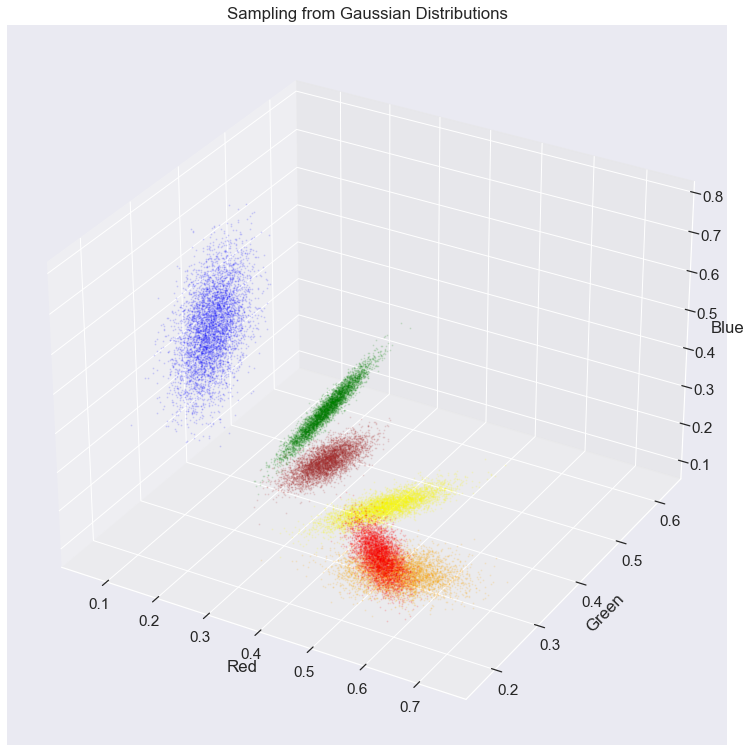

In [11]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
for i in range(6):
    ax.scatter(samps[i,:,0], samps[i,:,1], samps[i,:,2], 
               c=colourList[i], cmap=cmap, s=1, depthshade=False, alpha=0.1)
ax.title.set_text("Sampling from Gaussian Distributions")
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

In [12]:
#hf.makeGif(fig, ax, "Sampling from Gaussians.gif")

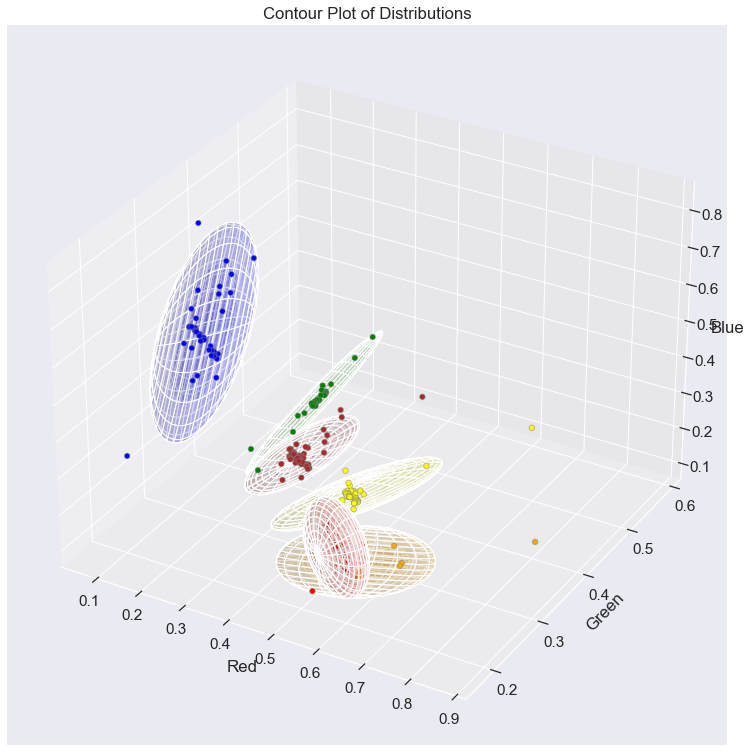

In [13]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y_true, cmap=cmap, edgecolor=edge, s=30, depthshade=False)
ax.title.set_text("Contour Plot of Distributions")
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

for i in range(6):
    hf.plot3DContour(mu[i], cov[i], [1,2,3], ax, color=colourList[i])

In [14]:
#hf.makeGif(fig, ax, "Estimated Gaussian Contours.gif")

## Prediction with Gaussians

In [15]:
from numpy.linalg import inv
from numpy.linalg import det

def MultivariateGaussian(x, mu, cov):
    return np.exp(-0.5 * (x-mu).T @ inv(cov) @ (x-mu)) / np.sqrt((2*np.pi)**len(x) * det(cov))

In [16]:
likelihoods = np.zeros((len(X),6))
for i in range(len(X)):
    for j in range(6):
        likelihoods[i,j] = MultivariateGaussian(X[i], mu[j], cov[j])

Text(0.5, 1.0, 'Gaussian Confusion Matrix')

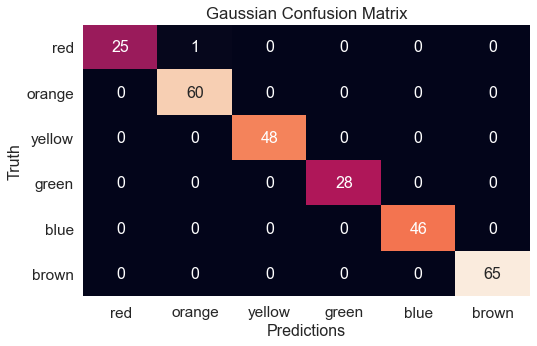

In [17]:
y_pred = np.argmax(likelihoods, axis=1)

plt.figure(figsize=(8,5))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix(y_true, y_pred), annot=True, annot_kws={"size": 16},
           xticklabels=['red','orange','yellow','green','blue','brown'],
           yticklabels=['red','orange','yellow','green','blue','brown'],
           cbar=False)
plt.xlabel("Predictions",fontsize=16)
plt.ylabel("Truth",fontsize=16)
plt.title("Gaussian Confusion Matrix")

# Fitting a Gaussian with MLE

Unfinished. Had trouble getting this to work..

In [18]:
# from numpy.linalg import inv
# from numpy.linalg import det
# import autograd.numpy as np
# from autograd import grad, elementwise_grad

# def MultivariateGaussian(x, mu, cov):
#     return np.exp(-0.5 * (x-mu).T @ inv(cov) @ (x-mu)) / np.sqrt((2*np.pi)**len(x) * det(cov))

# def loglik_gaussian(theta, X):
#     """Loss function which computes negative log-likelihood of observations."""
#     mu = theta[:3]
#     cov = unflatten(theta[3:])
    
#     loglik = 0
#     for x in X:
#         loglik -= np.log(MultivariateGaussian(mu, cov, x))
#     return loglik

# loglik = lambda theta, data=X: loglik_gaussian(theta, data)
# gradGauss = elementwise_grad(MultivariateGaussian)

In [19]:
# mu = np.array([0,0,0]) # initialise mean and covariance
# cov = np.diag([1,1,1])
# cov_flattened, unflatten = flatten(cov)
# theta = np.concatenate((mu,cov_flattened))
# bounds = [(None,None),(None,None),(None,None),
#           (0.01,None),(0.01,None),(0.01,None),
#           (0.01,None),(0.01,None),(0.01,None),
#           (0.01,None),(0.01,None),(0.01,None)]

# X_ = X[y==0]
# theta = scipy.optimize.minimize(loglik,theta,bounds=bounds).x